<a href="https://colab.research.google.com/github/Rohit-Nikam/Machine_Learning-CAP-5610-/blob/master/program5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras 
from keras.datasets import mnist
import matplotlib.pyplot as plt
learning_rate = 0.05
epochs = 50
batch_size = 500

Using TensorFlow backend.


In [0]:
def feature_addition():
  (x_train,Y_train), (x_test,Y_test) = mnist.load_data()
  print('The shape of x_train :',x_train.shape)
  print('The shape of Y_train :',Y_train.shape)
  print('The shape of x_test :',x_test.shape)
  print('The shape of Y_test :',Y_test.shape)
  
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  temp_train = [[0]]*x_train.shape[0]
  temp_test = [[0]]*x_test.shape[0]
  
  new_features_train = []
  new_features_test = []
  
  width_train = []
  height_train = []
  connectivity_train = []
  ones_train = []
  
  width_test = []
  height_test = []
  connectivity_test = []
  ones_test = []
  
  temporary = 0

  for i in range(x_train.shape[0]):
  ## here we add a new feature based on region connectivity
    if Y_train[i] == (1 or 2 or 3 or 4 or 5 or 7):
      temporary = 1
    if Y_train[i] == (0 or 6 or 9):
      temporary = 2
    if Y_train[i] == 8:
      temporary = 3 
                                
    connectivity_train.append(temporary)
      
  ## here we add a new feature based on height and width
    ##height
    temp = x_train[i]
    height = ((x_train.shape[1] - np.argmax(np.argmax(np.flip(temp,0),0),0)) - np.argmax(np.argmax(temp,0),0))/x_train.shape[1]
    height_train.append(height)
    ## Width
    width =  ((x_train.shape[2] - np.argmax(np.argmax(np.flip(temp,1),1))) - np.argmax(np.argmax(temp,1)))/x_train.shape[0]
    width_train.append(width)
  
  ## new feature. I chose to calculate total number of ones in an  training instance
    ones_sum = x_train[i].sum()/(x_train.shape[1]* x_train.shape[2])
    ones_train.append(ones_sum)
    
    temp_train[i] = x_train[i].ravel()
 
  new_features_train.extend((connectivity_train,height_train,width_train,ones_train))
  X_train = np.concatenate((np.array(temp_train),np.array(new_features_train).T),axis=1)
    
    
  
  for i in range(x_test.shape[0]):
    if Y_test[i] == (1 or 2 or 3 or 4 or 5 or 7):
      temporary = 1
    if Y_test[i] == (0 or 6 or 9):
      temporary = 2
    if Y_test[i] == 8:
      temporary = 3
      
    connectivity_test.append(temporary)
      
  ## here we add a new feature based on height and width
 ##height
    temp = x_test[i]
    height = ((x_test.shape[1] - np.argmax(np.argmax(np.flip(temp,0),0),0)) - np.argmax(np.argmax(temp,0),0))/x_test.shape[1]
    height_test.append(height)
    ## Width
    width =  ((x_test.shape[2] - np.argmax(np.argmax(np.flip(temp,1),1))) - np.argmax(np.argmax(temp,1)))/x_test.shape[0]
    width_test.append(width)
  
  ## new feature. I chose to calculate total number of ones in an training instance
    ones_sum = x_test[i].sum()/(x_test.shape[1]* x_test.shape[2])
    ones_test.append(ones_sum)
    
    temp_test[i] = x_test[i].ravel()
  
  new_features_test.extend((connectivity_test,height_test,width_test,ones_test))
  X_test = np.concatenate((np.array(temp_test),np.array(new_features_test).T),axis=1)

  return X_train,Y_train,X_test,Y_test

  

# **Shape of the training and test data set before addition of four new features.**

In [3]:
X_train,y_train,X_test,y_test = feature_addition()



The shape of x_train : (60000, 28, 28)
The shape of Y_train : (60000,)
The shape of x_test : (10000, 28, 28)
The shape of Y_test : (10000,)


# **Shape of the training and test data set after addition of four new features**

In [4]:
print('The shape of X_train :',X_train.shape)
print('The shape of y_train :',y_train.shape)
print('The shape of X_test :',X_test.shape)
print('The shape of y_test :',y_test.shape)

The shape of X_train : (60000, 788)
The shape of y_train : (60000,)
The shape of X_test : (10000, 788)
The shape of y_test : (10000,)


In [5]:
## here as we have multi-class labels. we make a class of 10 distinct numbers using one-hot encoder.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('The shape of y_train :',y_train.shape)
print('The shape of y_test :',y_test.shape)

The shape of y_train : (60000, 10)
The shape of y_test : (10000, 10)


In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))
sgd = keras.optimizers.SGD(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print('The shape of X_train :',X_train.shape)
print('The shape of y_train :',y_train.shape)
print('The shape of X_test :',X_test.shape)
print('The shape of y_test :',y_test.shape)

Instructions for updating:
Colocations handled automatically by placer.
The shape of X_train : (60000, 788)
The shape of y_train : (60000, 10)
The shape of X_test : (10000, 788)
The shape of y_test : (10000, 10)


In [7]:
model_fit = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 23us/step - loss: 1.1846 - acc: 0.7181 - val_loss: 0.7176 - val_acc: 0.8489
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.6403 - acc: 0.8539 - val_loss: 0.5428 - val_acc: 0.8764
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.5286 - acc: 0.8714 - val_loss: 0.4730 - val_acc: 0.8853
Epoch 4/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4751 - acc: 0.8806 - val_loss: 0.4348 - val_acc: 0.8905
Epoch 5/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4423 - acc: 0.8860 - val_loss: 0.4087 - val_acc: 0.8950
Epoch 6/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4196 - acc: 0.8905 - val_loss: 0.3900 - val_acc: 0.8989
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0

# **The accuracy of the model when we add 4 new features to is :**

In [8]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy of the given model is :',score[1])

Test Accuracy of the given model is : 0.9246


**From the above accuracy we can see that due to the new features the accuracy has increased from the previous  91.87 % to 92.91%**

This accurcy is low because we have no hidden layers. As we the number of hidden layers accuracy may increase.

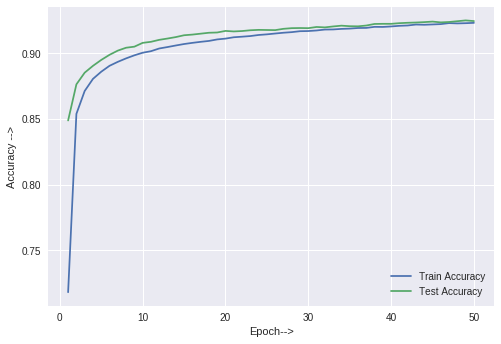

In [9]:
accuracy_plot = plt.plot(range(1,epochs+1),model_fit.history['acc'],range(1,epochs+1),model_fit.history['val_acc'])
plt.xlabel('Epoch-->')
plt.ylabel('Accuracy -->')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(accuracy_plot)

# **The above plot is of Epoch vs Accuracy for both Train accuracy and test accuracy**